In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MSALES.csv')

In [3]:
df.head()

,observation_date,MNFCTRSMNSA
0,1999-08-01,343497
1,1999-09-01,362479
2,1999-10-01,348259
3,1999-11-01,342120
4,1999-12-01,342374


In [4]:
df.columns = ['Data','Value']

In [11]:
df['RokMiesiac'] = pd.to_datetime(df['Data'], format='%Y-%m-%d').dt.to_period('M')
df['RokMiesiac']

0      1999-08
1      1999-09
2      1999-10
3      1999-11
4      1999-12
        ...   
307    2025-03
308    2025-04
309    2025-05
310    2025-06
311    2025-07
Name: RokMiesiac, Length: 312, dtype: period[M]

In [12]:
df

,Data,Value,RokMiesiac
0,1999-08-01,343497,1999-08
1,1999-09-01,362479,1999-09
2,1999-10-01,348259,1999-10
3,1999-11-01,342120,1999-11
4,1999-12-01,342374,1999-12
...,...,...,...
307,2025-03-01,627022,2025-03
308,2025-04-01,598594,2025-04
309,2025-05-01,608381,2025-05
310,2025-06-01,628960,2025-06


(array([408, 468, 528, 588, 648]),
 [Text(408, 0, '2004'),
  Text(468, 0, '2009'),
  Text(528, 0, '2014'),
  Text(588, 0, '2019'),
  Text(648, 0, '2024')])

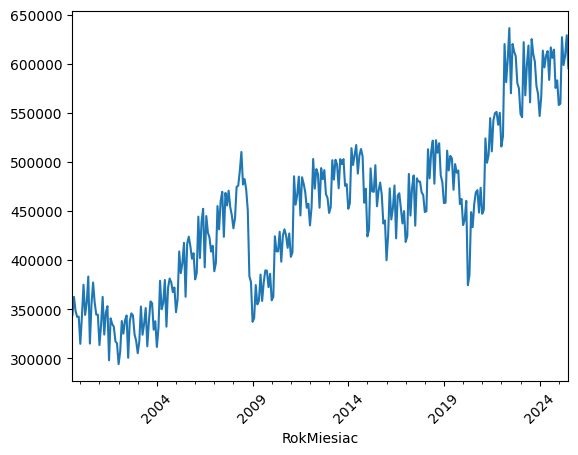

In [20]:
import matplotlib.pyplot as plt
df.groupby('RokMiesiac')['Value'].mean().plot(kind="line")
plt.xticks(rotation=45)

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

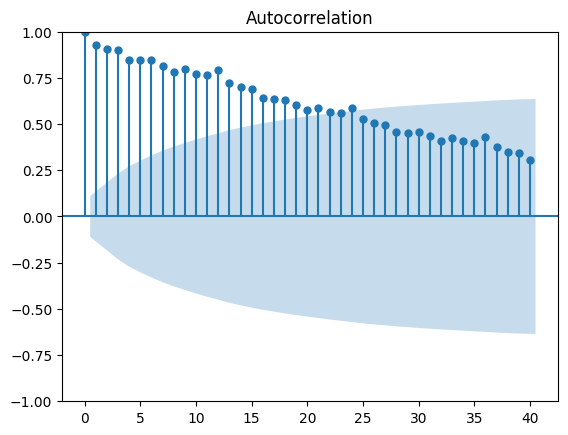

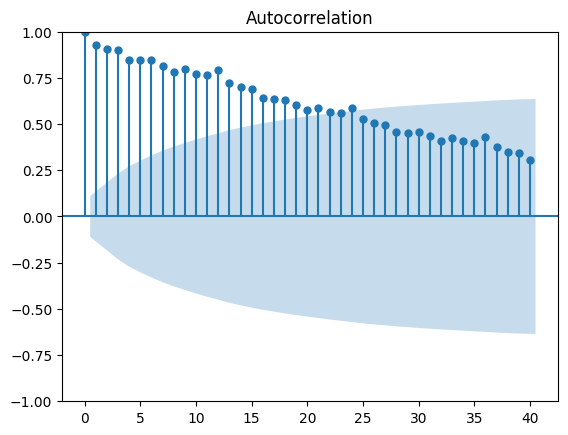

In [29]:
plot_acf(df['Value'], lags=40)

In [31]:
df['diff1'] = df['Value'].diff()

In [ ]:
d = 6
df[f'diff{d}'] = df['Value'].diff(d)

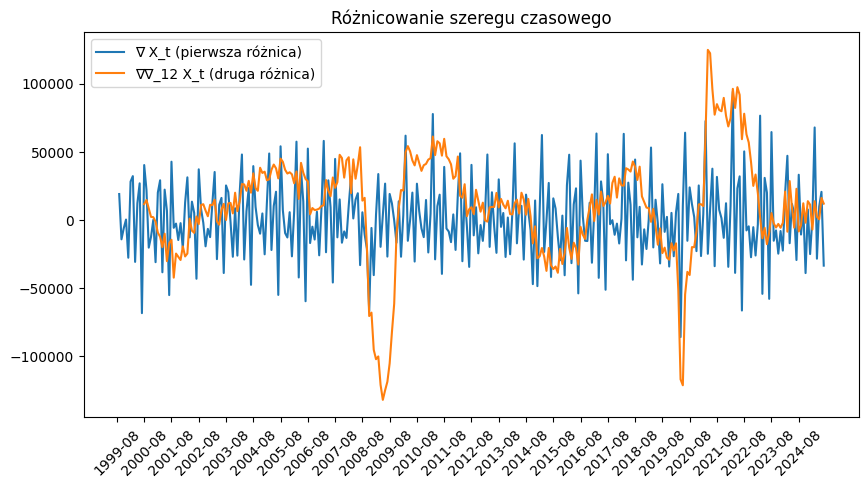

In [59]:
d = 12
plt.figure(figsize=(10, 5))
# plt.plot(df['Value'], label='Oryginał')
plt.plot(df[f'diff1'], label='∇ X_t (pierwsza różnica)')
plt.plot(df[f'diff{d}'], label=f'∇∇_{d} X_t (druga różnica)')
plt.xticks(ticks=range(0, len(df), d), labels=df['RokMiesiac'][::d], rotation=45)
plt.legend()
plt.title('Różnicowanie szeregu czasowego')
plt.show()

C:\Users\Paweł\AppData\Local\Temp\ipykernel_3048\2172497805.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


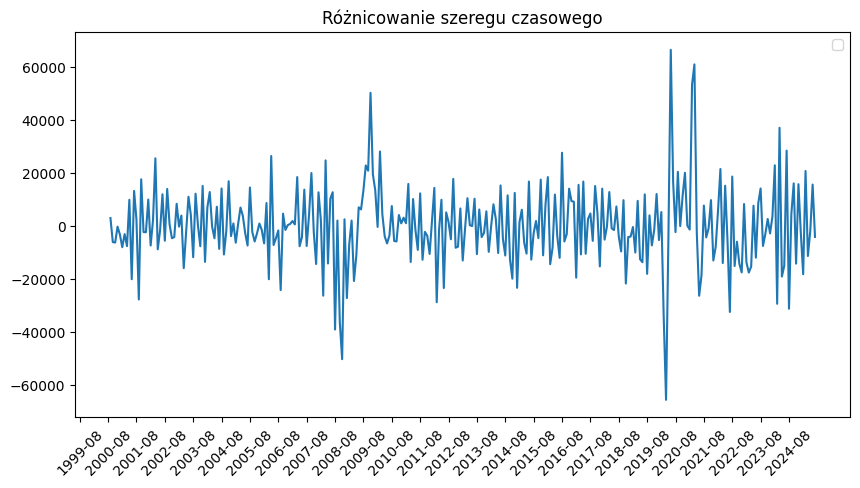

In [61]:
df['diffidx'] = df['Value'].diff().diff(12)
plt.figure(figsize=(10, 5))
# plt.plot(df['Value'], label='Oryginał')
plt.plot(df[f'diffidx'])
plt.xticks(ticks=range(0, len(df), d), labels=df['RokMiesiac'][::d], rotation=45)
plt.legend()
plt.title('Różnicowanie szeregu czasowego')
plt.show()

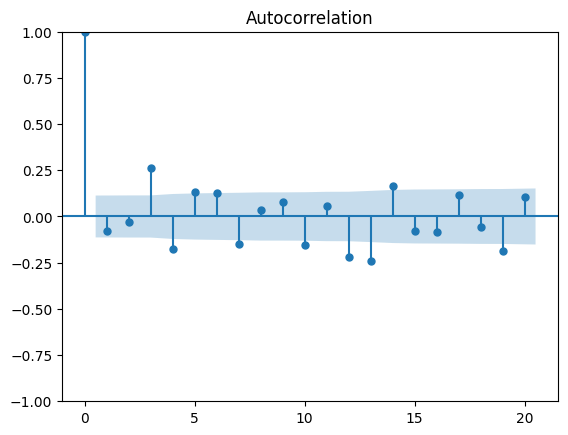

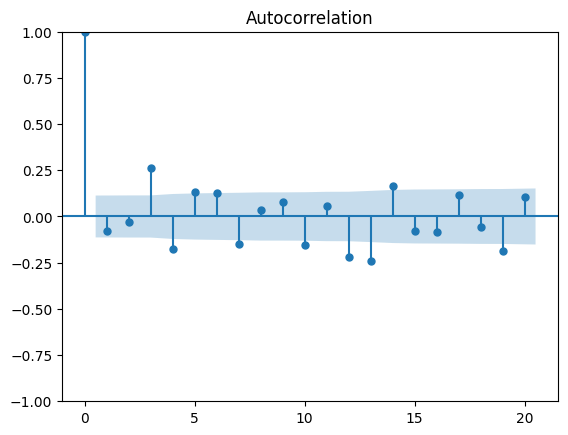

In [65]:
plot_acf(df['diffidx'].dropna(), lags=20)

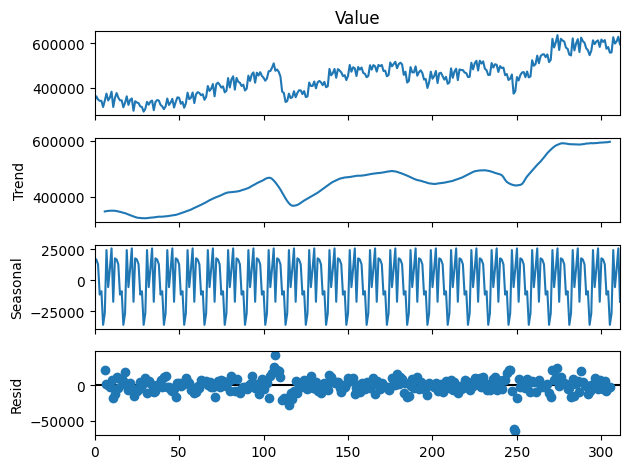

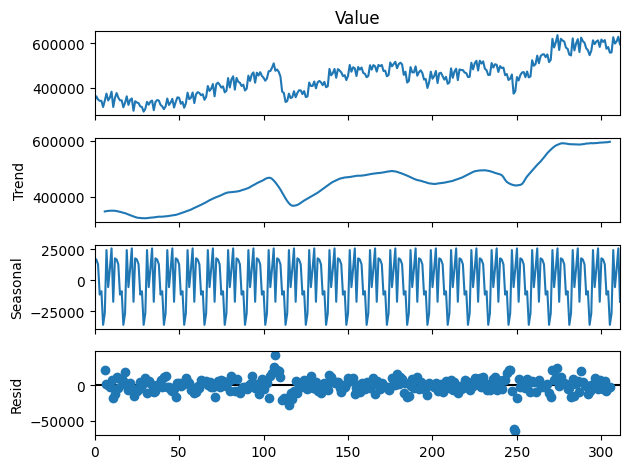

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Value'], model='additive', period=12)
decomposition.plot()

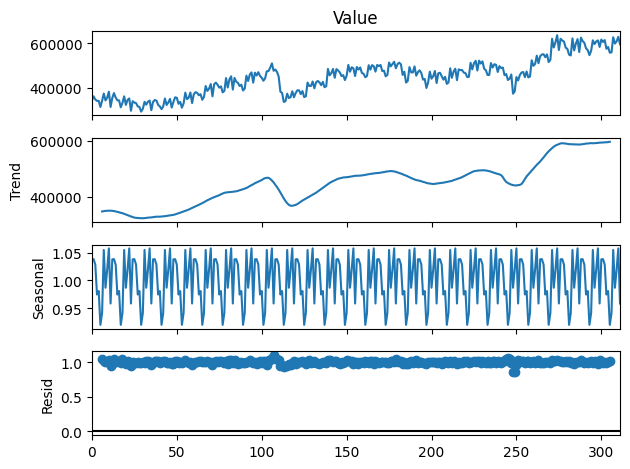

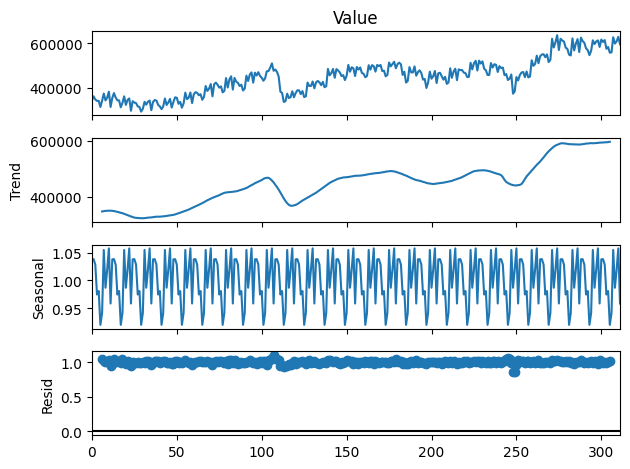

In [55]:
decomposition = seasonal_decompose(df['Value'], model='multiplicative', period=12)
decomposition.plot()

In [66]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [96]:
acorr_ljungbox(df['diffidx'].dropna(), lags=[i for i in range(24)], return_df=True)

,lb_stat,lb_pvalue
0,145.248392,NaN
1,1.753053,1.854934e-01
2,1.987035,3.702720e-01
3,23.035410,3.970250e-05
4,32.616338,1.431210e-06
5,38.086185,3.625767e-07
6,42.968982,1.183038e-07
7,49.688754,1.662631e-08
8,50.046573,4.003397e-08
9,51.970949,4.577857e-08


In [95]:
acorr_ljungbox(df['Value'].dropna(), lags=[i for i in range(24)], return_df=True)

,lb_stat,lb_pvalue
0,4135.452687,NaN
1,272.017092,4.123810e-61
2,532.522588,2.313073e-116
3,788.770374,1.179382e-170
4,1017.402678,6.041313e-219
5,1245.797243,3.528590e-267
6,1474.331850,0.000000e+00
7,1686.844638,0.000000e+00
8,1884.857067,0.000000e+00
9,2091.383056,0.000000e+00


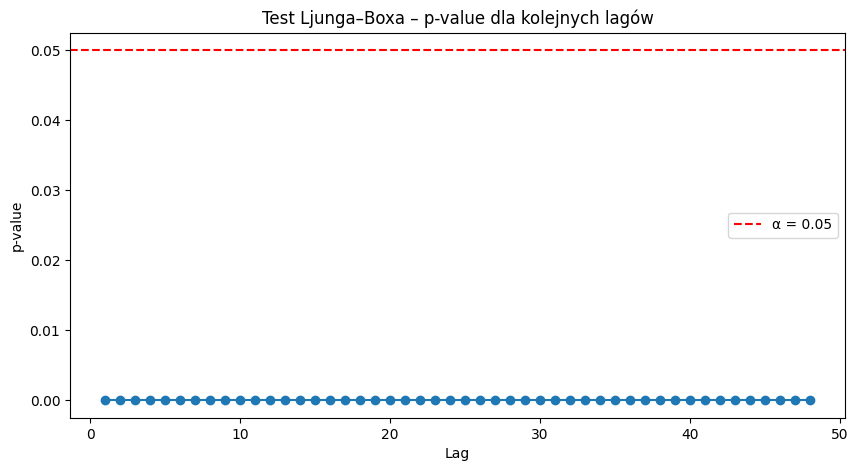

In [97]:
import numpy as np

result = acorr_ljungbox(df['Value'], lags=np.arange(1, 49), return_df=True)
plt.figure(figsize=(10,5))
plt.plot(result.index, result['lb_pvalue'], marker='o')
plt.axhline(0.05, color='red', linestyle='--', label='α = 0.05')
plt.title("Test Ljunga–Boxa – p-value dla kolejnych lagów")
plt.xlabel("Lag")
plt.ylabel("p-value")
plt.legend()
plt.show()
